<a href="https://colab.research.google.com/github/hudanjhh/SECB4313/blob/main/BMS_RNN_wSMOTE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
import numpy as np
import pandas as pd

In [ ]:
data_path = '/content/drive/My Drive/Bio Modelling & Simulation/Breast Cancer for Group Project/'

In [ ]:
feature = pd.read_csv(data_path + 'smote.csv')

In [ ]:
X = feature.iloc[:,:-1]
y = feature.iloc[:,-1]

In [ ]:
# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = np.reshape(X_train.values, (X_train.shape[0], 1, X_train.shape[1]))
X_val = np.reshape(X_val.values, (X_val.shape[0], 1, X_val.shape[1]))

# Define LSTM model
model = Sequential()
model.add(LSTM(units=64, input_shape=(1, 12000)))  # Input shape: 12000 features
model.add(Dense(units=6, activation='softmax'))  # Output layer for 6 classes

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/10
34/34 [==============================] - 6s 103ms/step - loss: 1.5111 - accuracy: 0.5443 - val_loss: 1.4062 - val_accuracy: 0.6717
Epoch 2/10
34/34 [==============================] - 2s 50ms/step - loss: 1.3291 - accuracy: 0.7585 - val_loss: 1.2736 - val_accuracy: 0.7283
Epoch 3/10
34/34 [==============================] - 2s 46ms/step - loss: 1.2272 - accuracy: 0.6962 - val_loss: 1.2113 - val_accuracy: 0.7094
Epoch 4/10
34/34 [==============================] - 2s 48ms/step - loss: 1.1672 - accuracy: 0.7519 - val_loss: 1.1466 - val_accuracy: 0.7925
Epoch 5/10
34/34 [==============================] - 2s 48ms/step - loss: 1.1074 - accuracy: 0.8802 - val_loss: 1.0765 - val_accuracy: 0.9585
Epoch 6/10
34/34 [==============================] - 2s 47ms/step - loss: 1.0371 - accuracy: 0.9623 - val_loss: 1.0248 - val_accuracy: 0.9547
Epoch 7/10
34/34 [==============================] - 2s 47ms/step - loss: 0.9800 - accuracy: 0.9736 - val_loss: 0.9706 - val_accuracy: 0.9509
Epoch 8/10
3

In [ ]:
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)

9/9 [==============================] - 1s 9ms/step


In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_val, y_val)
print(f'Validation accuracy: {accuracy:.4f}')

9/9 [==============================] - 0s 11ms/step - loss: 0.8439 - accuracy: 0.9585
Validation accuracy: 0.9585


In [ ]:
y_pred_classes

array([4, 1, 4, 1, 5, 4, 1, 5, 3, 1, 4, 2, 3, 1, 1, 2, 5, 1, 3, 3, 1, 1,
       3, 1, 2, 3, 5, 2, 2, 2, 1, 5, 1, 4, 2, 3, 1, 4, 2, 4, 2, 4, 3, 2,
       3, 5, 2, 2, 4, 5, 4, 1, 4, 4, 4, 2, 2, 1, 4, 1, 4, 2, 4, 3, 5, 4,
       1, 5, 4, 4, 4, 2, 4, 5, 2, 3, 3, 5, 5, 1, 1, 5, 2, 3, 1, 5, 4, 5,
       2, 4, 4, 2, 2, 2, 2, 4, 1, 2, 4, 3, 5, 4, 2, 5, 3, 3, 5, 4, 4, 5,
       1, 3, 5, 3, 4, 5, 5, 1, 4, 5, 1, 4, 2, 4, 4, 5, 3, 1, 3, 2, 5, 5,
       4, 1, 4, 5, 3, 2, 5, 5, 2, 1, 1, 4, 5, 3, 1, 5, 3, 2, 2, 5, 1, 2,
       2, 5, 3, 1, 5, 2, 4, 2, 5, 1, 4, 5, 2, 1, 4, 4, 1, 1, 4, 3, 5, 3,
       1, 3, 3, 3, 4, 5, 5, 2, 4, 4, 5, 5, 2, 4, 4, 5, 4, 1, 5, 5, 5, 3,
       2, 1, 1, 2, 3, 3, 3, 4, 3, 2, 2, 5, 3, 5, 2, 2, 1, 2, 2, 1, 5, 3,
       4, 5, 3, 5, 1, 1, 5, 4, 2, 3, 3, 3, 5, 3, 1, 4, 3, 3, 1, 1, 4, 2,
       5, 1, 4, 1, 5, 1, 3, 1, 4, 5, 1, 5, 3, 2, 1, 2, 2, 2, 4, 4, 4, 2,
       5])

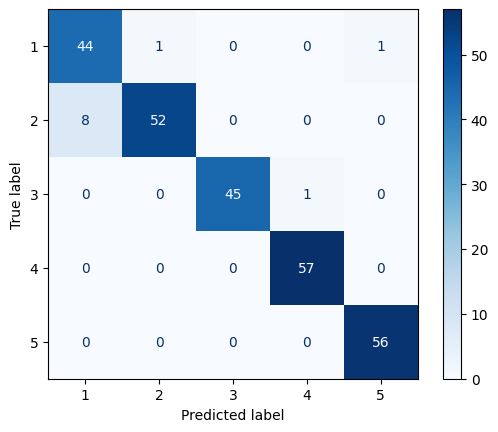

In [ ]:
# Construct confusion matrix
cm = confusion_matrix(y_val, y_pred_classes)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[1, 2, 3, 4, 5])
disp.plot(cmap=plt.cm.Blues)
plt.show()

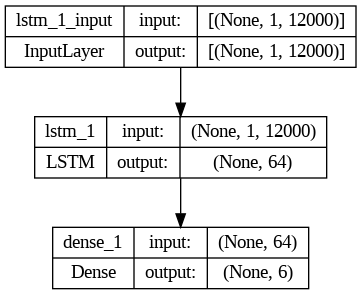

In [ ]:
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

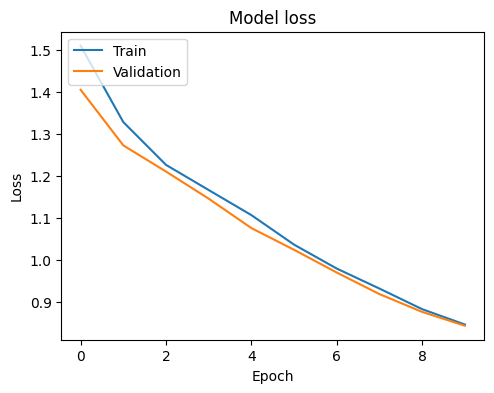

In [ ]:
# Plot training & validation loss values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

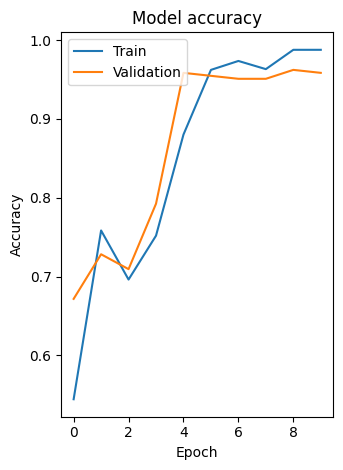

In [ ]:
# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.tight_layout()
plt.show()

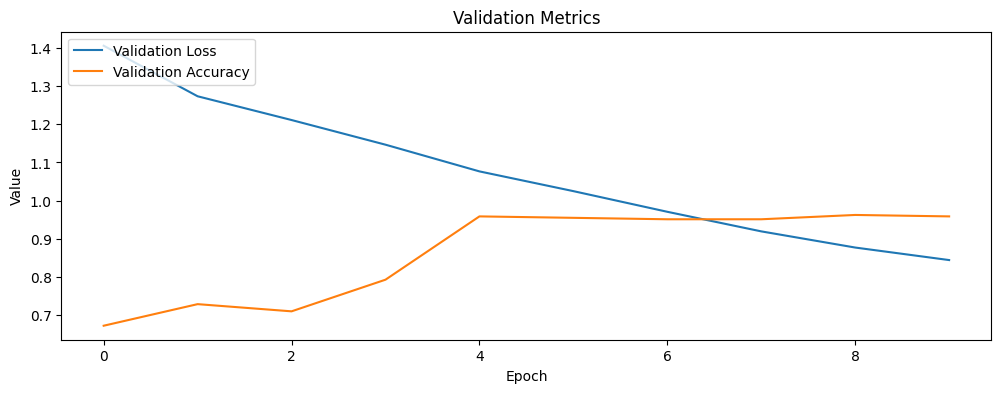

In [ ]:
# Plot validation loss and accuracy values in the same graph
plt.figure(figsize=(12, 4))
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Validation Metrics')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()